# 1. 卷积原理

① 卷积核不停的在原图上进行滑动，对应元素相乘再相加。

② 下图为每次滑动移动1格，然后再利用原图与卷积核上的数值进行计算得到缩略图矩阵的数据，如下图右所示。

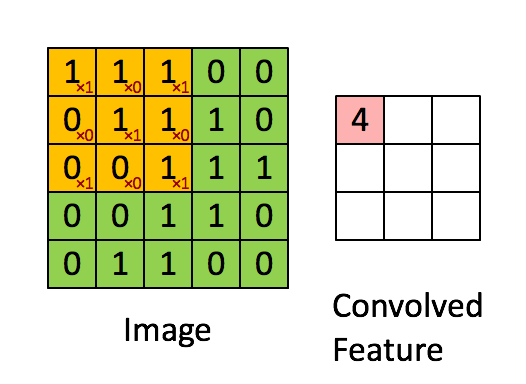

In [2]:
import torch
import torch.nn.functional as F

input = torch.tensor([[1, 2, 0, 3, 1],
                      [0, 1, 2, 3, 1],
                      [1, 2, 1, 0, 0],
                      [5, 2, 3, 1, 1],
                      [2, 1, 0, 1, 1]])

kernel = torch.tensor([[1, 2, 1],
                       [0, 1, 0],
                       [2, 1, 0]])

print(input.shape)
print(kernel.shape)
input = torch.reshape(input, (1,1,5,5))
kernel = torch.reshape(kernel, (1,1,3,3))
print(input.shape)
print(kernel.shape)

output = F.conv2d(input, kernel, stride=1)
print(output)

torch.Size([5, 5])
torch.Size([3, 3])
torch.Size([1, 1, 5, 5])
torch.Size([1, 1, 3, 3])
tensor([[[[10, 12, 12],
          [18, 16, 16],
          [13,  9,  3]]]])


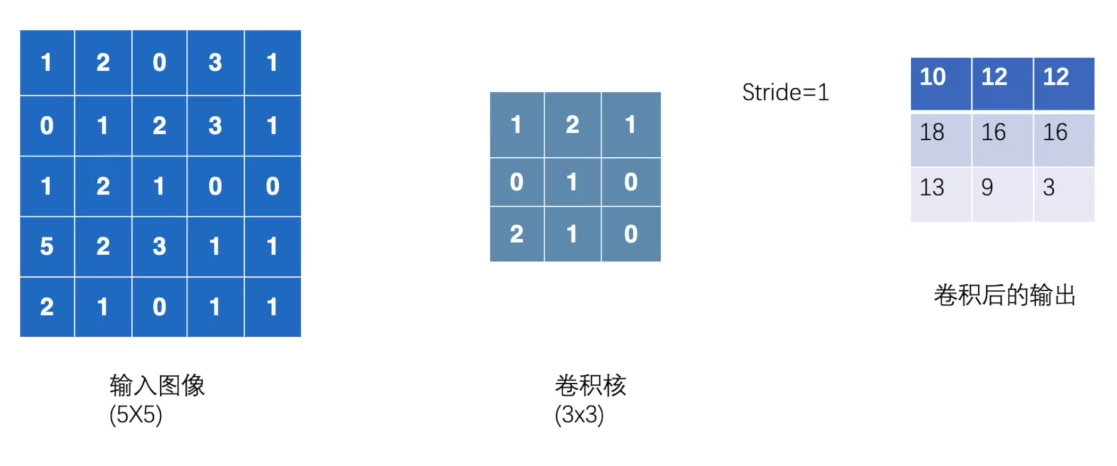

In [3]:
import torch
import torch.nn.functional as F

input = torch.tensor([[1, 2, 0, 3, 1],
                      [0, 1, 2, 3, 1],
                      [1, 2, 1, 0, 0],
                      [5, 2, 3, 1, 1],
                      [2, 1, 0, 1, 1]])

kernel = torch.tensor([[1, 2, 1],
                       [0, 1, 0],
                       [2, 1, 0]])

print(input.shape)
print(kernel.shape)
input = torch.reshape(input, (1,1,5,5))
kernel = torch.reshape(kernel, (1,1,3,3))
print(input.shape)
print(kernel.shape)

output2 = F.conv2d(input, kernel, stride=2)  # 步伐为2
print(output2)

torch.Size([5, 5])
torch.Size([3, 3])
torch.Size([1, 1, 5, 5])
torch.Size([1, 1, 3, 3])
tensor([[[[10, 12],
          [13,  3]]]])


In [2]:
import torch
import torch.nn.functional as F

input = torch.tensor([[1, 2, 0, 3, 1],
                      [0, 1, 2, 3, 1],
                      [1, 2, 1, 0, 0],
                      [5, 2, 3, 1, 1],
                      [2, 1, 0, 1, 1]])

kernel = torch.tensor([[1, 2, 1],
                       [0, 1, 0],
                       [2, 1, 0]])

print(input.shape)
print(kernel.shape)
input = torch.reshape(input, (1,1,5,5))
kernel = torch.reshape(kernel, (1,1,3,3))
print(input.shape)
print(kernel.shape)

output3 = F.conv2d(input, kernel, stride=1, padding=1)  # 周围只填充一层
print(output3)

torch.Size([5, 5])
torch.Size([3, 3])
torch.Size([1, 1, 5, 5])
torch.Size([1, 1, 3, 3])
tensor([[[[ 1,  3,  4, 10,  8],
          [ 5, 10, 12, 12,  6],
          [ 7, 18, 16, 16,  8],
          [11, 13,  9,  3,  4],
          [14, 13,  9,  7,  4]]]])


# 2. 步幅、填充原理

① 步幅：卷积核经过输入特征图的采样间隔。设置步幅的目的：希望减小输入参数的数目，减少计算量。

② 填充：在输入特征图的每一边添加一定数目的行列。设置填充的目的：希望每个输入方块都能作为卷积窗口的中心，或使得输出的特征图的长、宽 = 输入的特征图的长、宽。

③ 一个尺寸 a * a 的特征图，经过 b * b 的卷积层，步幅（stride）= c，填充（padding）= d，若d等于0，也就是不填充，输出的特征图的尺寸 =（a-b）/ c+1；若d不等于0，也就是填充，输出的特征图的尺寸 =（a+2d-b）/ c+1。

例子1：一个特征图尺寸为4 * 4的输入，使用3 * 3的卷积核，步幅=1，填充=0，输出的尺寸=(4 - 3)/1 + 1 = 2。

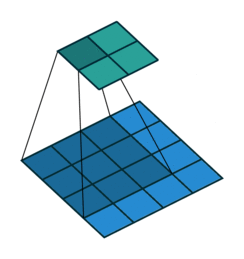

例子2：  一个特征图尺寸为5 * 5的输入，使用3 * 3的卷积核，步幅=1，填充=1，输出的尺寸=(5 + 2 * 1 - 3)/1 + 1 = 5。

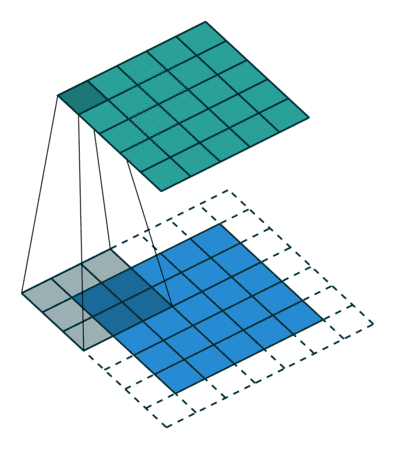

例子3：一个特征图尺寸为5 * 5的输入， 使用3 * 3的卷积核，步幅=2，填充=0，输出的尺寸=(5-3)/2 + 1 = 2。

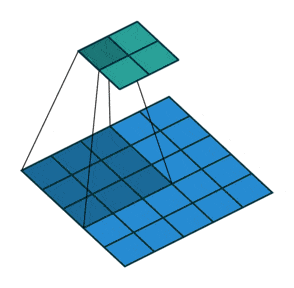

例子4：一个特征图尺寸为6 * 6的输入， 使用3 * 3的卷积核，步幅=2，填充=1，输出的尺寸=(6 + 2 * 1 - 3)/2 + 1 = 2.5 + 1 = 3.5 向下取整=3（降采样：边长减少1/2）。

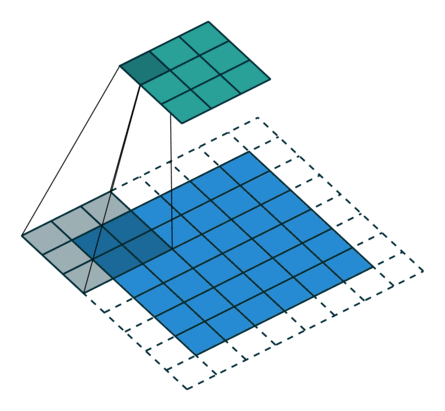

#  3. 多通道卷积计算

实际中的图像都是多个通道组成的，我们怎么计算卷积呢？

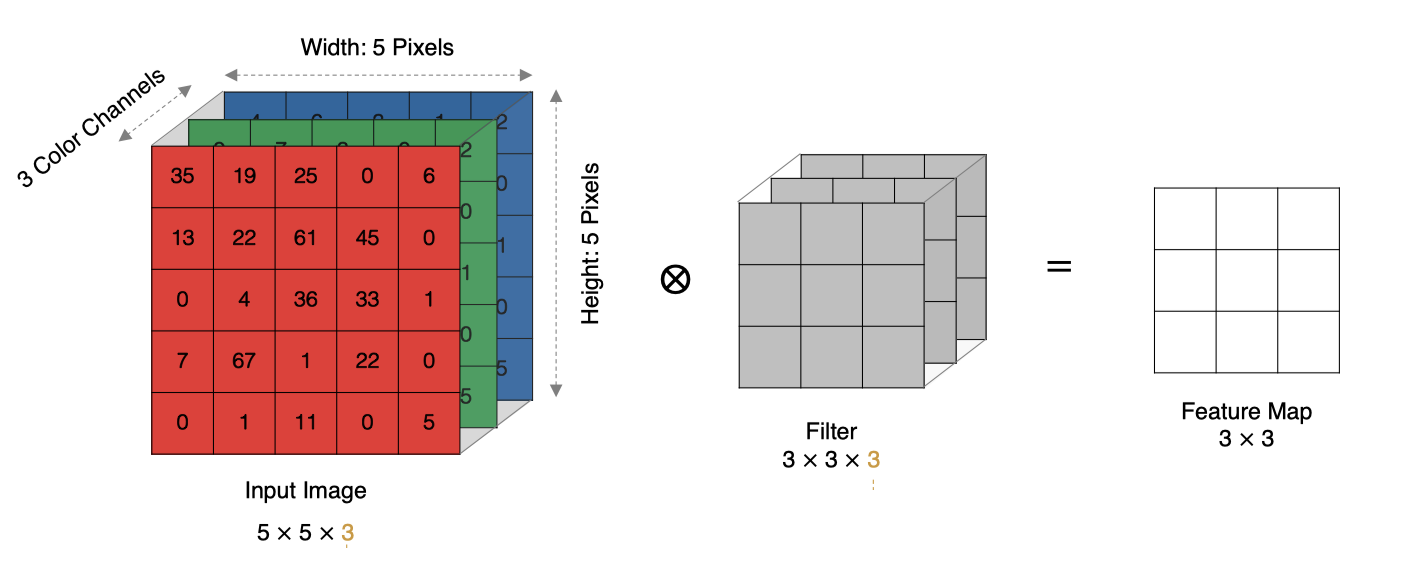

计算方法如下： 1. 当输入有多个通道(Channel), 例如 RGB 三个通道, 此时要求卷积核需要拥有相同的通道数数. 2. 每个卷积核通道与对应的输入图像的各个通道进行卷积. 3. 将每个通道的卷积结果按位相加得到最终的特征图.

如下图所示:

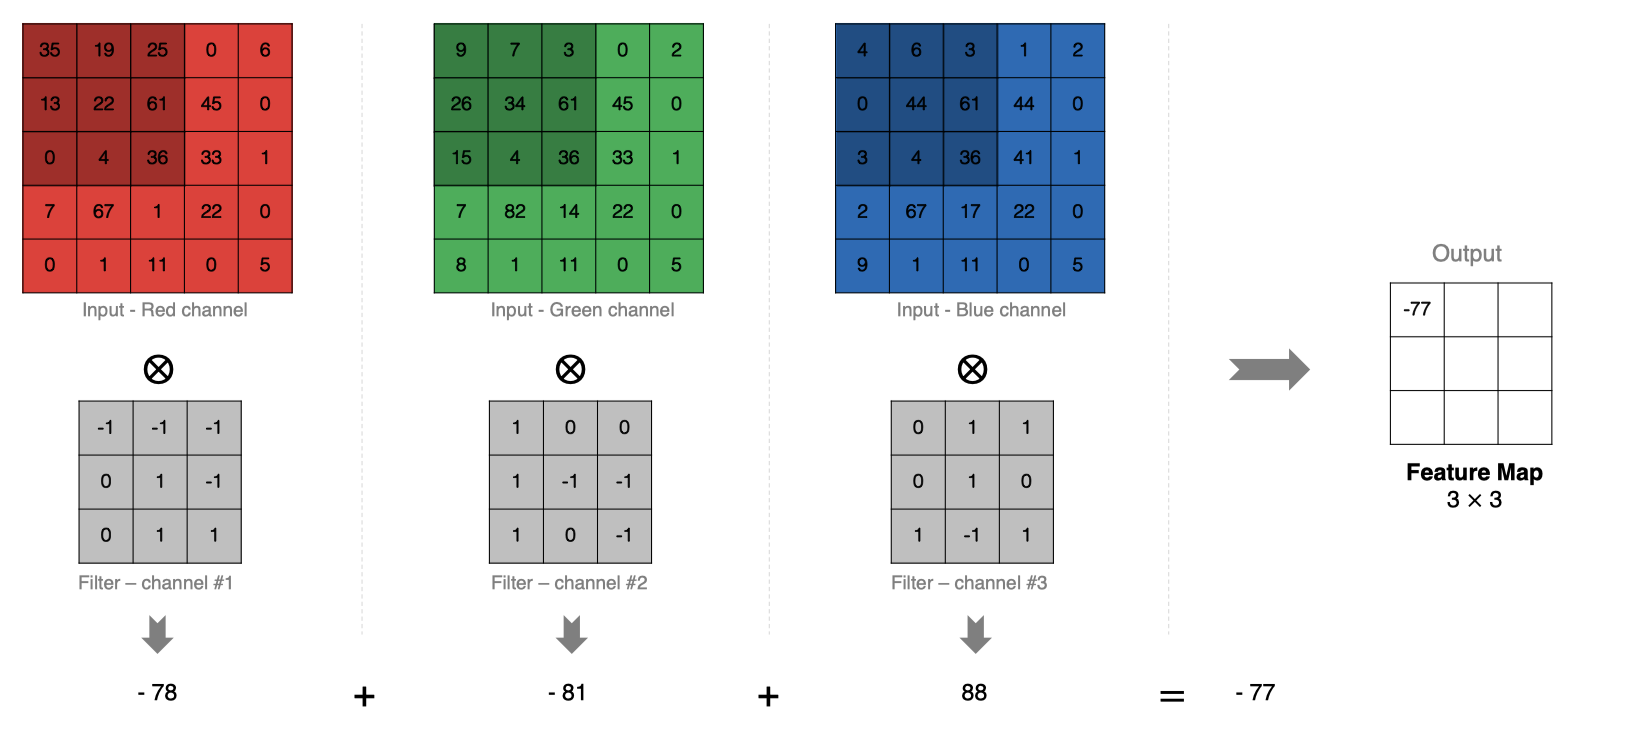

# 4.多卷积核卷积计算


上面的例子里我们只使用一个卷积核进行特征提取, 实际对图像进行特征提取时, 我们需要使用多个卷积核进行特征提取. 这个多个卷积核可以理解为从不同到的视角、不同的角度对图像特征进行提取.

那么, 当使用多个卷积核时, 应该怎么进行特征提取呢?


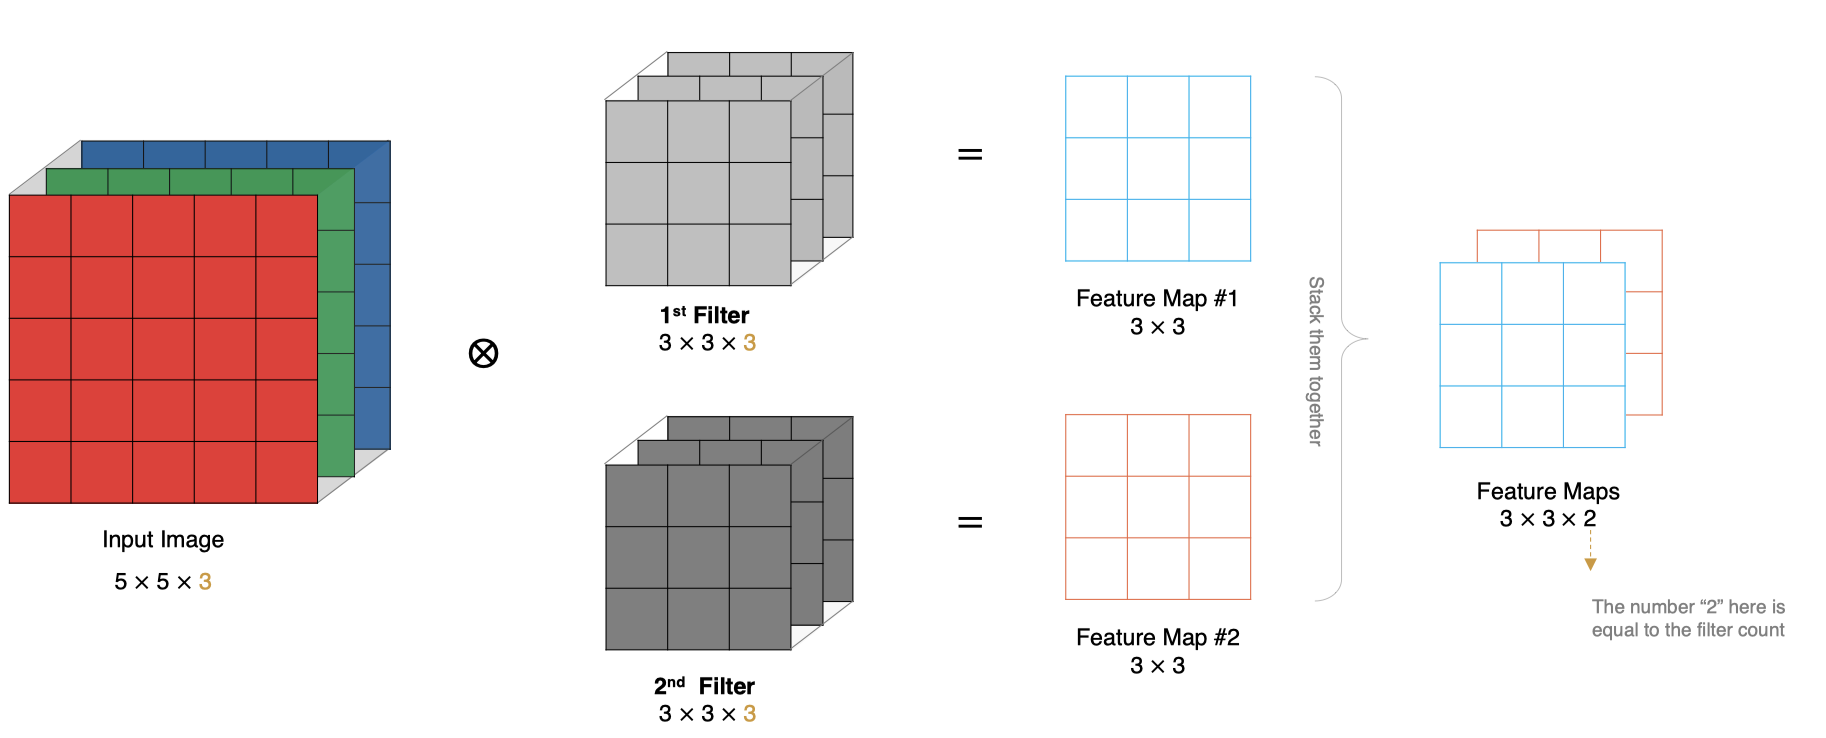

# 5.特征图大小

输出特征图的大小与以下参数息息相关:

size: 卷积核/过滤器大小，一般会选择为奇数，比如有 1*1, 3*3， 5*5*
Padding: 零填充的方式
Stride: 步长
那计算方法如下图所示:

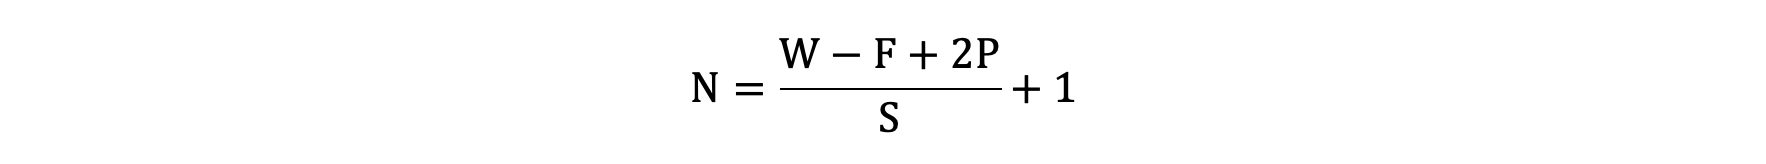

输入图像大小: W x W
卷积核大小: F x F
Stride: S
Padding: P
输出图像大小: N x N


以下图为例:

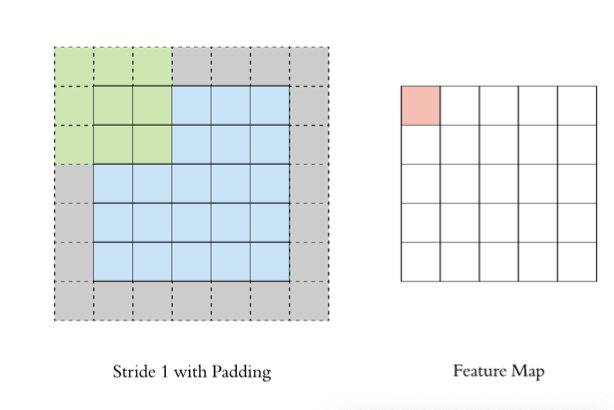

图像大小: 5 x 5
卷积核大小: 3 x 3
Stride: 1
Padding: 1
(5 - 3 + 2) / 1 + 1 = 5, 即得到的特征图大小为: 5 x 5




# 6. PyTorch 卷积层 


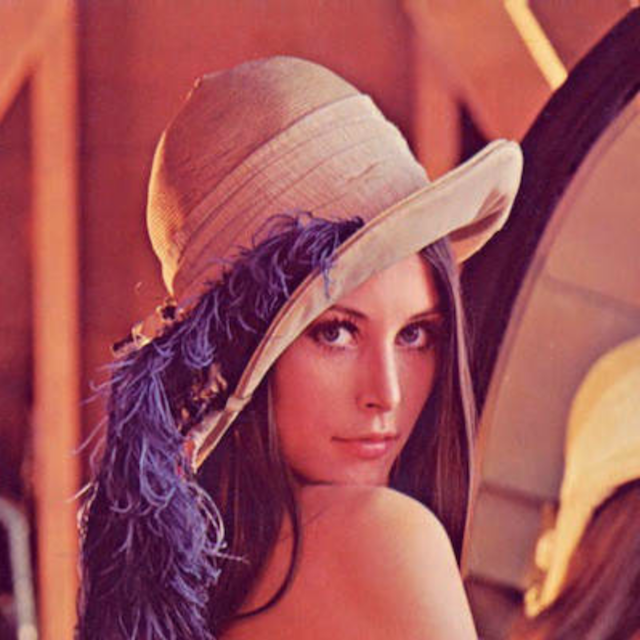


test01 函数使用一个多通道卷积核进行特征提取, test02 函数使用3个多通道卷积核进行特征提取:

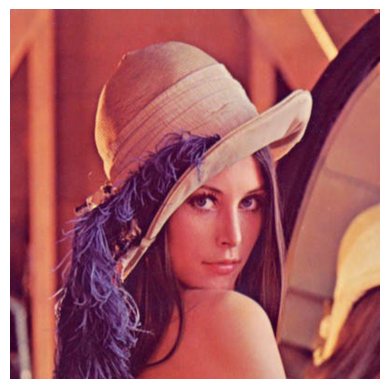

torch.Size([3, 640, 640])


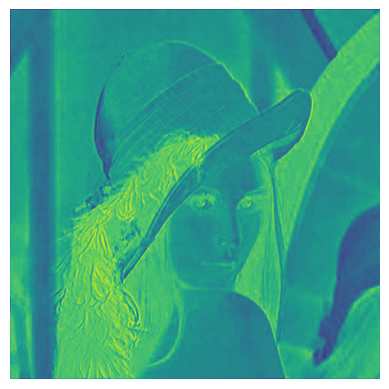

torch.Size([640, 640, 1])


In [4]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


# 显示图像
def show(img):

    # 输入形状: (Height, Width, Channel)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


# 1. 单个多通道卷积核
def test01():

    # 读取图像, 形状: (640, 640, 3)
    img = plt.imread('./assets/image.png')
    show(img)

    # 构建卷积层
    # 由于 out_channels 为 1, 相当于只有一个3通道卷积核
    conv = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, stride=1, padding=1)

    # 输入形状: (BatchSize, Channel, Height, Width)
    # mg形状: torch.Size([3, 640, 640])
    img = torch.tensor(img).permute(2, 0, 1)
    print(img.shape)  # torch.Size([3, 640, 640])

    # img 形状: torch.Size([1, 4, 640, 640])
    img = img.unsqueeze(0)

    # 输入卷积层, new_img 形状: torch.Size([1, 1, 640, 640])
    new_img = conv(img)

    # new_img 形状: torch.Size([640, 640, 1])
    new_img = new_img.squeeze(0).permute(1, 2, 0)

    show(new_img.detach().numpy())
    print(new_img.shape)

if __name__ == '__main__':
    test01()


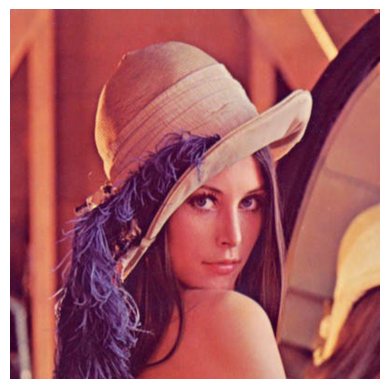

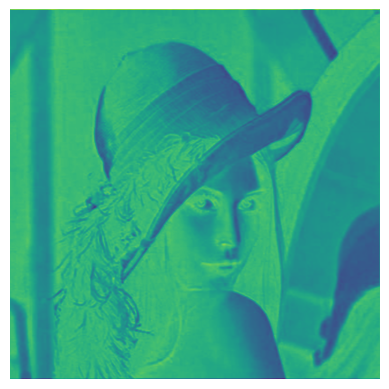

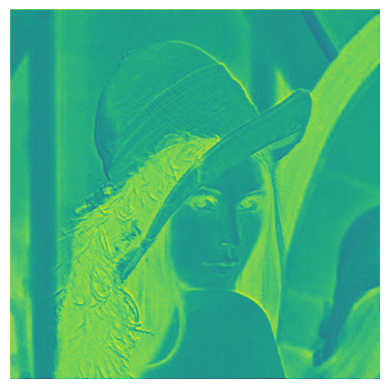

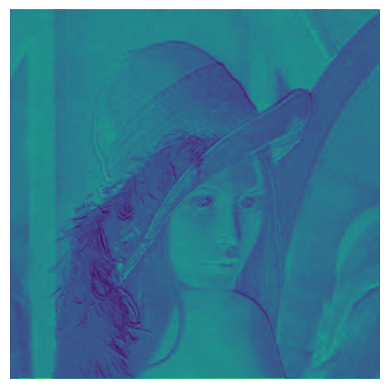

In [6]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


# 显示图像
def show(img):

    # 输入形状: (Height, Width, Channel)
    plt.imshow(img)
    plt.axis('off')
    plt.show()



# 2. 多个多通道卷积核
def test02():

    # 读取图像, 形状: (640, 640, 3)
    img = plt.imread('./assets/image.png')
    show(img)

    # 构建卷积层
    # 由于 out_channels 为 3, 相当于只有 3 个3通道卷积核
    conv = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)

    # 输入形状: (BatchSize, Channel, Height, Width)
    # img形状: torch.Size([3, 640, 640])
    img = torch.tensor(img).permute(2, 0, 1)

    # img 形状: torch.Size([1, 3, 640, 640])
    img = img.unsqueeze(0)

    # 输入卷积层, new_img 形状: torch.Size([1, 3, 640, 640])
    new_img = conv(img)

    # new_img 形状: torch.Size([640, 640, 3])
    new_img = new_img.squeeze(0).permute(1, 2, 0)

    # 打印三个特征图
    show(new_img[:, :, 0].unsqueeze(2).detach().numpy())
    show(new_img[:, :, 1].unsqueeze(2).detach().numpy())
    show(new_img[:, :, 2].unsqueeze(2).detach().numpy())


if __name__ == '__main__':
    test02()